In [1]:
import numpy as np
import pandas as pd

# cleaning data and modifying

In [2]:
nursery_data=pd.read_csv("nursery.csv",header=None)

In [3]:
nursery_data.head()

,0,1,2,3,4,5,6,7,8
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [4]:
nursery_data.shape

(12960, 9)

In [5]:
nursery_data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [6]:
nursery_data.columns=["parents","has_nurs","form","children","housing","finance","social","health","class"]
nursery_data.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


# handling categorical data

In [7]:
cols=["parents","has_nurs","form","children","housing","finance","social","health","class"]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cols:
    nursery_data[i]=le.fit_transform(nursery_data[i])
nursery_data.head()   

,parents,has_nurs,form,children,housing,finance,social,health,class
0,2,3,0,0,0,0,0,2,2
1,2,3,0,0,0,0,0,1,1
2,2,3,0,0,0,0,0,0,0
3,2,3,0,0,0,0,2,2,2
4,2,3,0,0,0,0,2,1,1


# target data and the data for training and testing

In [8]:
#target
target=nursery_data["class"]
target.shape

(12960,)

In [9]:
#data
data=nursery_data.drop(columns=["class"])
data.shape

(12960, 8)

# partitioning the data

In [10]:
##partioning of data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.3)

In [11]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(9072, 8) (3888, 8) (9072,) (3888,)


# standard scaler for the accuracy

In [12]:
x_train.describe()

,parents,has_nurs,form,children,housing,finance,social,health
count,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000
mean,1.006063,1.995260,1.496032,1.497244,1.001874,0.501653,1.001213,0.993276
std,0.815371,1.413777,1.115819,1.119373,0.816877,0.500025,0.815122,0.815906
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,3.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000
max,2.000000,4.000000,3.000000,3.000000,2.000000,1.000000,2.000000,2.000000


In [13]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 8954 to 12794
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   parents   9072 non-null   int32
 1   has_nurs  9072 non-null   int32
 2   form      9072 non-null   int32
 3   children  9072 non-null   int32
 4   housing   9072 non-null   int32
 5   finance   9072 non-null   int32
 6   social    9072 non-null   int32
 7   health    9072 non-null   int32
dtypes: int32(8)
memory usage: 354.4 KB


In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_sc=pd.DataFrame(sc.fit_transform(x_train))
x_train_sc.describe()


,0,1,2,3,4,5,6,7
count,9.072000e+03,9.072000e+03,9.072000e+03,9.072000e+03,9.072000e+03,9.072000e+03,9.072000e+03,9.072000e+03
mean,2.271356e-17,-9.751165e-17,6.265809e-18,-7.127358e-17,6.265809e-17,-7.558132e-17,-2.662969e-17,1.170923e-16
std,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00
min,-1.233940e+00,-1.411376e+00,-1.340822e+00,-1.337647e+00,-1.226536e+00,-1.003312e+00,-1.228366e+00,-1.217457e+00
25%,-1.233940e+00,-7.040114e-01,-1.340822e+00,-1.337647e+00,-1.226536e+00,-1.003312e+00,-1.228366e+00,-1.217457e+00
50%,-7.435814e-03,3.352807e-03,-4.445697e-01,-4.442412e-01,-2.294105e-03,9.966986e-01,-1.487617e-03,8.241581e-03
75%,1.219068e+00,7.107170e-01,4.516828e-01,1.342571e+00,1.221948e+00,9.966986e-01,1.225390e+00,1.233940e+00
max,1.219068e+00,1.418081e+00,1.347935e+00,1.342571e+00,1.221948e+00,9.966986e-01,1.225390e+00,1.233940e+00


In [15]:
x_test_sc=pd.DataFrame(sc.fit_transform(x_test))
x_test_sc.describe()

,0,1,2,3,4,5,6,7
count,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03
mean,-1.023415e-16,-8.726444e-17,-2.193033e-17,8.817821e-17,1.462022e-17,-1.370646e-17,2.741291e-18,3.883496e-17
std,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00
min,-1.203659e+00,-1.420890e+00,-1.343625e+00,-1.351033e+00,-1.220585e+00,-9.923135e-01,-1.216370e+00,-1.242035e+00
25%,-1.203659e+00,-7.143521e-01,-4.533703e-01,-4.541889e-01,-1.220585e+00,-9.923135e-01,-1.216370e+00,-1.242035e+00
50%,1.727139e-02,-7.814078e-03,4.368841e-01,4.426554e-01,5.360358e-03,-9.923135e-01,3.451139e-03,-1.918565e-02
75%,1.238202e+00,6.987239e-01,1.327138e+00,4.426554e-01,1.231306e+00,1.007746e+00,1.223272e+00,1.203663e+00
max,1.238202e+00,1.405262e+00,1.327138e+00,1.339500e+00,1.231306e+00,1.007746e+00,1.223272e+00,1.203663e+00


# modelling the data

# perceptron

In [16]:
##perceptron
from sklearn.linear_model import Perceptron
p=Perceptron()
p.fit(x_train_sc,y_train)

Perceptron()

In [17]:
from sklearn.metrics import accuracy_score
x_train_pred = p.predict(x_train_sc)
x_test_pred=p.predict(x_test_sc)
print("Training accuracy:",accuracy_score(x_train_pred,y_train))
print("Testing accuracy:",accuracy_score(x_test_pred,y_test))


Training accuracy: 0.6576278659611993
Testing accuracy: 0.6373456790123457


# logistic regression


In [18]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_sc,y_train)

LogisticRegression()

In [19]:
x_train_pred=lr.predict(x_train_sc)
x_test_pred=lr.predict(x_test_sc)
print("training accuracy:",accuracy_score(x_train_pred,y_train))
print("testing accuracy:",accuracy_score(x_test_pred,y_test))

training accuracy: 0.7724867724867724
testing accuracy: 0.7556584362139918


# SVM

In [20]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train_sc,y_train)

SVC()

In [21]:
x_train_pred=svc.predict(x_train_sc)
x_test_pred=svc.predict(x_test_sc)
print("training accuracy:",accuracy_score(x_train_pred,y_train))
print("training accuracy:",accuracy_score(x_test_pred,y_test))

training accuracy: 0.9604276895943563
training accuracy: 0.9501028806584362


In [22]:
#kernel poly
svc1=SVC(kernel='poly')
svc1.fit(x_train_sc,y_train)

SVC(kernel='poly')

In [23]:
x_train_pred=svc1.predict(x_train_sc)
x_test_pred=svc1.predict(x_test_sc)
print("training accuracy:",accuracy_score(x_train_pred,y_train))
print("training accuracy:",accuracy_score(x_test_pred,y_test))

training accuracy: 0.8969356261022927
training accuracy: 0.8865740740740741


In [24]:
#kernal linear
svc2=SVC(kernel='linear')
svc2.fit(x_train_sc,y_train)

SVC(kernel='linear')

In [25]:
svm_lin_train_pred=svc2.predict(x_train_sc)
svm_lin_test_pred=svc2.predict(x_test_sc)
print("training accuracy:",accuracy_score(svm_lin_train_pred,y_train))
print("testing accuracy:",accuracy_score(svm_lin_test_pred,y_test))

training accuracy: 0.7732583774250441
testing accuracy: 0.7543724279835391


# decision tree classifier 

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier()        #default it is gini
dt1.fit(x_train_sc,y_train)

DecisionTreeClassifier()

In [27]:
x_train_pred=dt1.predict(x_train_sc)
x_test_pred=dt1.predict(x_test_sc)
print("training accuracy:",accuracy_score(x_train_pred,y_train))
print("testing accuracy:",accuracy_score(x_test_pred,y_test))

training accuracy: 1.0
testing accuracy: 0.9948559670781894


In [28]:
from sklearn.tree import DecisionTreeClassifier
dt2=DecisionTreeClassifier(criterion='entropy')
dt2.fit(x_train_sc,y_train)

DecisionTreeClassifier(criterion='entropy')

In [29]:
x_train_pred=dt2.predict(x_train_sc)
x_test_pred=dt2.predict(x_test_sc)
print("training accuracy:",accuracy_score(x_train_pred,y_train))
print("testing accuracy:",accuracy_score(x_test_pred,y_test))

training accuracy: 1.0
testing accuracy: 0.9943415637860082


[Text(0.7201852818371608, 0.96875, 'x[7] <= -0.605\ngini = 0.682\nsamples = 9072\nvalue = [3050, 2981, 2822, 219]'),
 Text(0.7160099164926931, 0.90625, 'gini = 0.0\nsamples = 3050\nvalue = [3050, 0, 0, 0]'),
 Text(0.7243606471816284, 0.90625, 'x[1] <= 1.064\ngini = 0.534\nsamples = 6022\nvalue = [0, 2981, 2822, 219]'),
 Text(0.5411012526096033, 0.84375, 'x[1] <= -0.35\ngini = 0.519\nsamples = 4829\nvalue = [0, 2831, 1779, 219]'),
 Text(0.3298538622129436, 0.78125, 'x[0] <= 0.606\ngini = 0.5\nsamples = 2419\nvalue = [0, 945, 1425, 49]'),
 Text(0.1409185803757829, 0.71875, 'x[7] <= 0.621\ngini = 0.355\nsamples = 1610\nvalue = [0, 371, 1239, 0]'),
 Text(0.03496868475991649, 0.65625, 'x[0] <= -0.621\ngini = 0.17\nsamples = 808\nvalue = [0, 76, 732, 0]'),
 Text(0.020876826722338204, 0.59375, 'x[2] <= -0.893\ngini = 0.024\nsamples = 413\nvalue = [0, 5, 408, 0]'),
 Text(0.016701461377870562, 0.53125, 'x[3] <= -0.891\ngini = 0.095\nsamples = 100\nvalue = [0, 5, 95, 0]'),
 Text(0.01252609603340

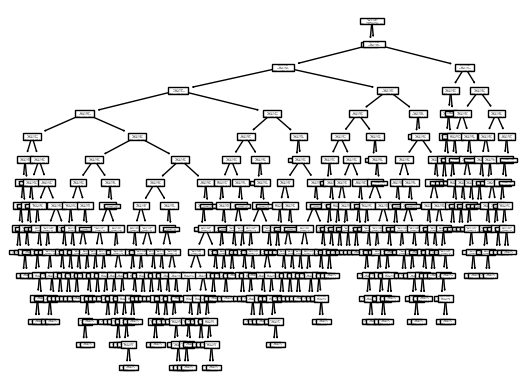

In [30]:
from sklearn import tree
tree.plot_tree(dt1)

[Text(0.7124313186813187, 0.96875, 'x[7] <= -0.605\nentropy = 1.71\nsamples = 9072\nvalue = [3050, 2981, 2822, 219]'),
 Text(0.7080357142857143, 0.90625, 'entropy = 0.0\nsamples = 3050\nvalue = [3050, 0, 0, 0]'),
 Text(0.7168269230769231, 0.90625, 'x[1] <= 1.064\nentropy = 1.188\nsamples = 6022\nvalue = [0, 2981, 2822, 219]'),
 Text(0.532554945054945, 0.84375, 'x[1] <= -0.35\nentropy = 1.185\nsamples = 4829\nvalue = [0, 2831, 1779, 219]'),
 Text(0.3239010989010989, 0.78125, 'x[0] <= 0.606\nentropy = 1.093\nsamples = 2419\nvalue = [0, 945, 1425, 49]'),
 Text(0.13681318681318683, 0.71875, 'x[7] <= 0.621\nentropy = 0.779\nsamples = 1610\nvalue = [0, 371, 1239, 0]'),
 Text(0.03571428571428571, 0.65625, 'x[0] <= -0.621\nentropy = 0.45\nsamples = 808\nvalue = [0, 76, 732, 0]'),
 Text(0.02197802197802198, 0.59375, 'x[2] <= -0.893\nentropy = 0.094\nsamples = 413\nvalue = [0, 5, 408, 0]'),
 Text(0.017582417582417582, 0.53125, 'x[3] <= -0.891\nentropy = 0.286\nsamples = 100\nvalue = [0, 5, 95, 0

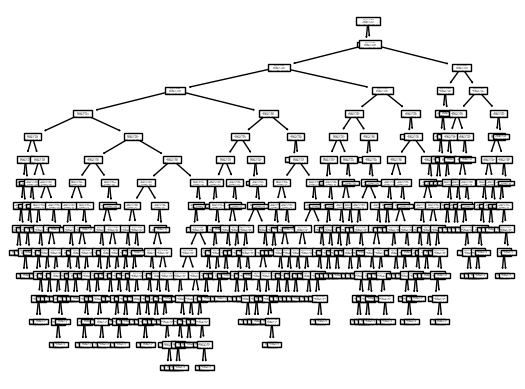

In [31]:
from sklearn import tree
tree.plot_tree(dt2)

# kneighbour

In [32]:
from sklearn.neighbors import KNeighborsClassifier
kmn=KNeighborsClassifier()
kmn.fit(x_train_sc,y_train)

KNeighborsClassifier()

In [33]:
x_train_pred=kmn.predict(x_train_sc)
x_test_pred=kmn.predict(x_test_sc)
print("training accuracy:",accuracy_score(x_train_pred,y_train))
print("testing accuracy:",accuracy_score(x_test_pred,y_test))

training accuracy: 0.9548059964726632
testing accuracy: 0.8837448559670782


# guassian naive bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train_sc,y_train)

GaussianNB()

In [35]:
x_train_pred=nb.predict(x_train_sc)
x_test_pred=nb.predict(x_test_sc)
print("training accuracy:",accuracy_score(x_train_pred,y_train))
print("testing accuracy:",accuracy_score(x_test_pred,y_test))

training accuracy: 0.6412037037037037
testing accuracy: 0.5059156378600823


# majority voting

In [36]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=[('p', Perceptron()),('lr', LogisticRegression()),( 'dt2', DecisionTreeClassifier()),( 'svc2', SVC())])
vc.fit(x_train_sc,y_train)

x_train_pred=vc.predict(x_train_sc)
x_test_pred=vc.predict(x_test_sc)
print("training accuracy:",accuracy_score(x_train_pred,y_train))
print("testing accuracy:",accuracy_score(x_test_pred,y_test))

training accuracy: 0.9049823633156967
testing accuracy: 0.8955761316872428


# random forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=10)
rfc.fit(x_train_sc,y_train)

x_train_pred=rfc.predict(x_train_sc)
x_test_pred=rfc.predict(x_test_sc)
print("training accuracy:",accuracy_score(x_train_pred,y_train))
print("testing accuracy:",accuracy_score(x_test_pred,y_test))


training accuracy: 0.9988977072310405
testing accuracy: 0.9621913580246914


# ada boost classifier

In [38]:
from sklearn.ensemble import AdaBoostClassifier
abc= AdaBoostClassifier()
abc.fit(x_train_sc,y_train)

x_train_pred=abc.predict(x_train_sc)
x_test_pred=abc.predict(x_test_sc)
print("training accuracy:",accuracy_score(x_train_pred,y_train))
print("testing accuracy:",accuracy_score(x_test_pred,y_test))


training accuracy: 0.8305776014109347
testing accuracy: 0.8325617283950617


# gradient boosting classifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier()
gbc.fit(x_train_sc,y_train)

x_train_pred=gbc.predict(x_train_sc)
x_test_pred=gbc.predict(x_test_sc)
print("training accuracy:",accuracy_score(x_train_pred,y_train))
print("testing accuracy:",accuracy_score(x_test_pred,y_test))


training accuracy: 0.9829144620811288
testing accuracy: 0.9799382716049383


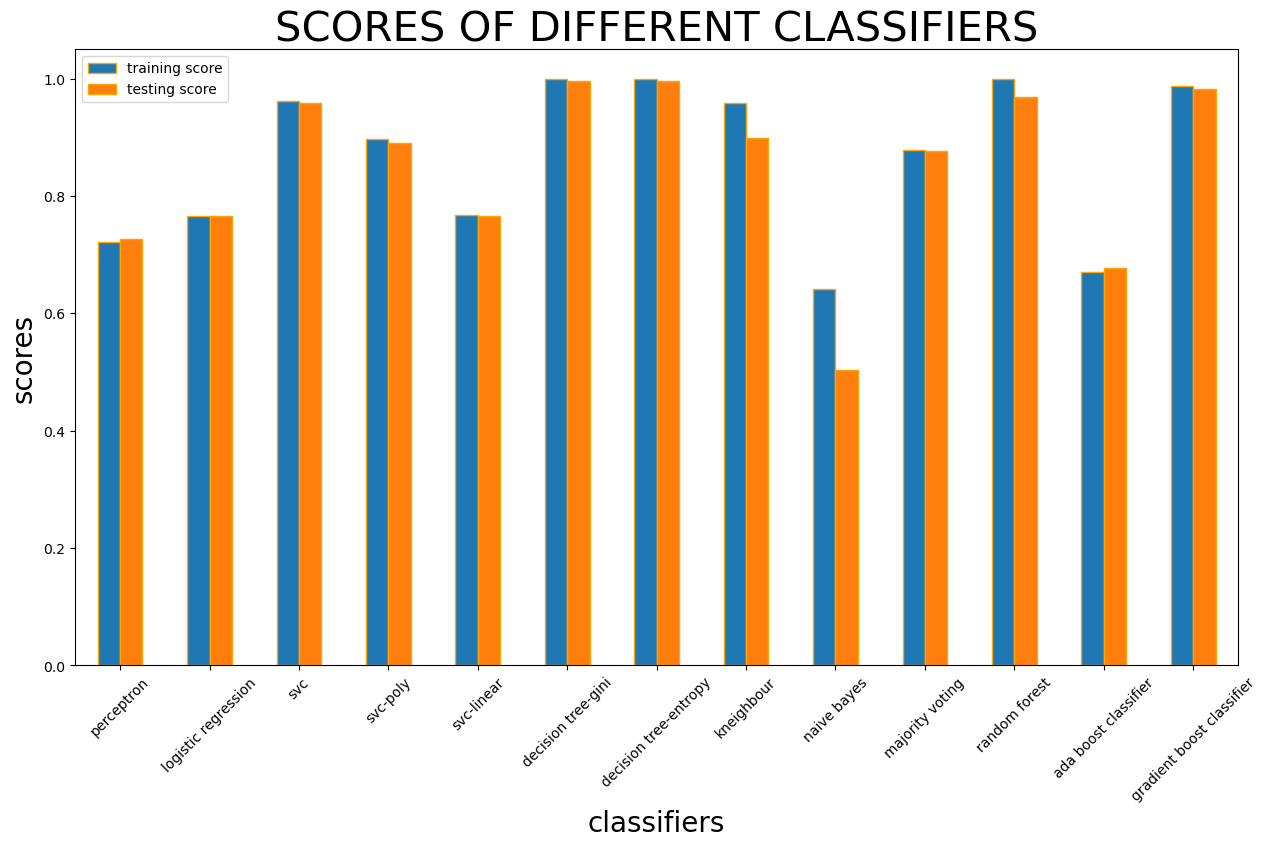

In [40]:
import matplotlib.pyplot as plt

plotdata = pd.DataFrame({

    "training score":[0.722663139329806,0.7659832451499118,0.9627425044091711,0.8978174603174603,0.7686287477954145,
                    1.0,1.0,0.958994708994709,0.6413139329805997, 0.8792989417989417,0.9991181657848325,
                     0.6714065255731922,0.9869929453262787],

    "testing score":[0.7271090534979424,0.7662037037037037,0.9593621399176955,0.8909465020576132,0.7664609053497943,
                     0.9958847736625515,0.9963991769547325,0.8989197530864198,0.503343621399177,0.8765432098765432,
                     0.9683641975308642,0.6766975308641975,0.9830246913580247],},

    index=["perceptron","logistic regression","svc","svc-poly","svc-linear","decision tree-gini","decision tree-entropy",
           "kneighbour","naive bayes","majority voting","random forest","ada boost classifier","gradient boost classifier"])

plotdata.plot(kind="bar",edgecolor="orange",figsize=(15, 8))
plt.title("SCORES OF DIFFERENT CLASSIFIERS",fontsize=30)
plt.xlabel("classifiers",fontsize=20)
plt.ylabel("scores",fontsize=20)
plt.xticks(rotation=45)
plt.show()

# -----------------------------------------------regression---------------------------------------------

In [148]:
import pandas as pd


In [149]:
df=pd.read_csv('auto-mpg.csv', na_values='?', header=None, sep="\s+")

In [150]:
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


# data cleaning

In [151]:
df.isna().sum()

0    0
1    0
2    0
3    6
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [152]:
df=df.fillna(0)

In [153]:
df.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [154]:
df.columns=["displacement","mpg","cylinders","horsepower","weight","acceleration","model_year","origin","car_name"]
df.head()

,displacement,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [155]:
cols=["car_name"]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cols:
    df[i]=le.fit_transform(df[i])
df.head() 

,displacement,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,49
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,36
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,231
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,14
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,161


In [156]:
df.head()

,displacement,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,49
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,36
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,231
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,14
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,161


# pair plot

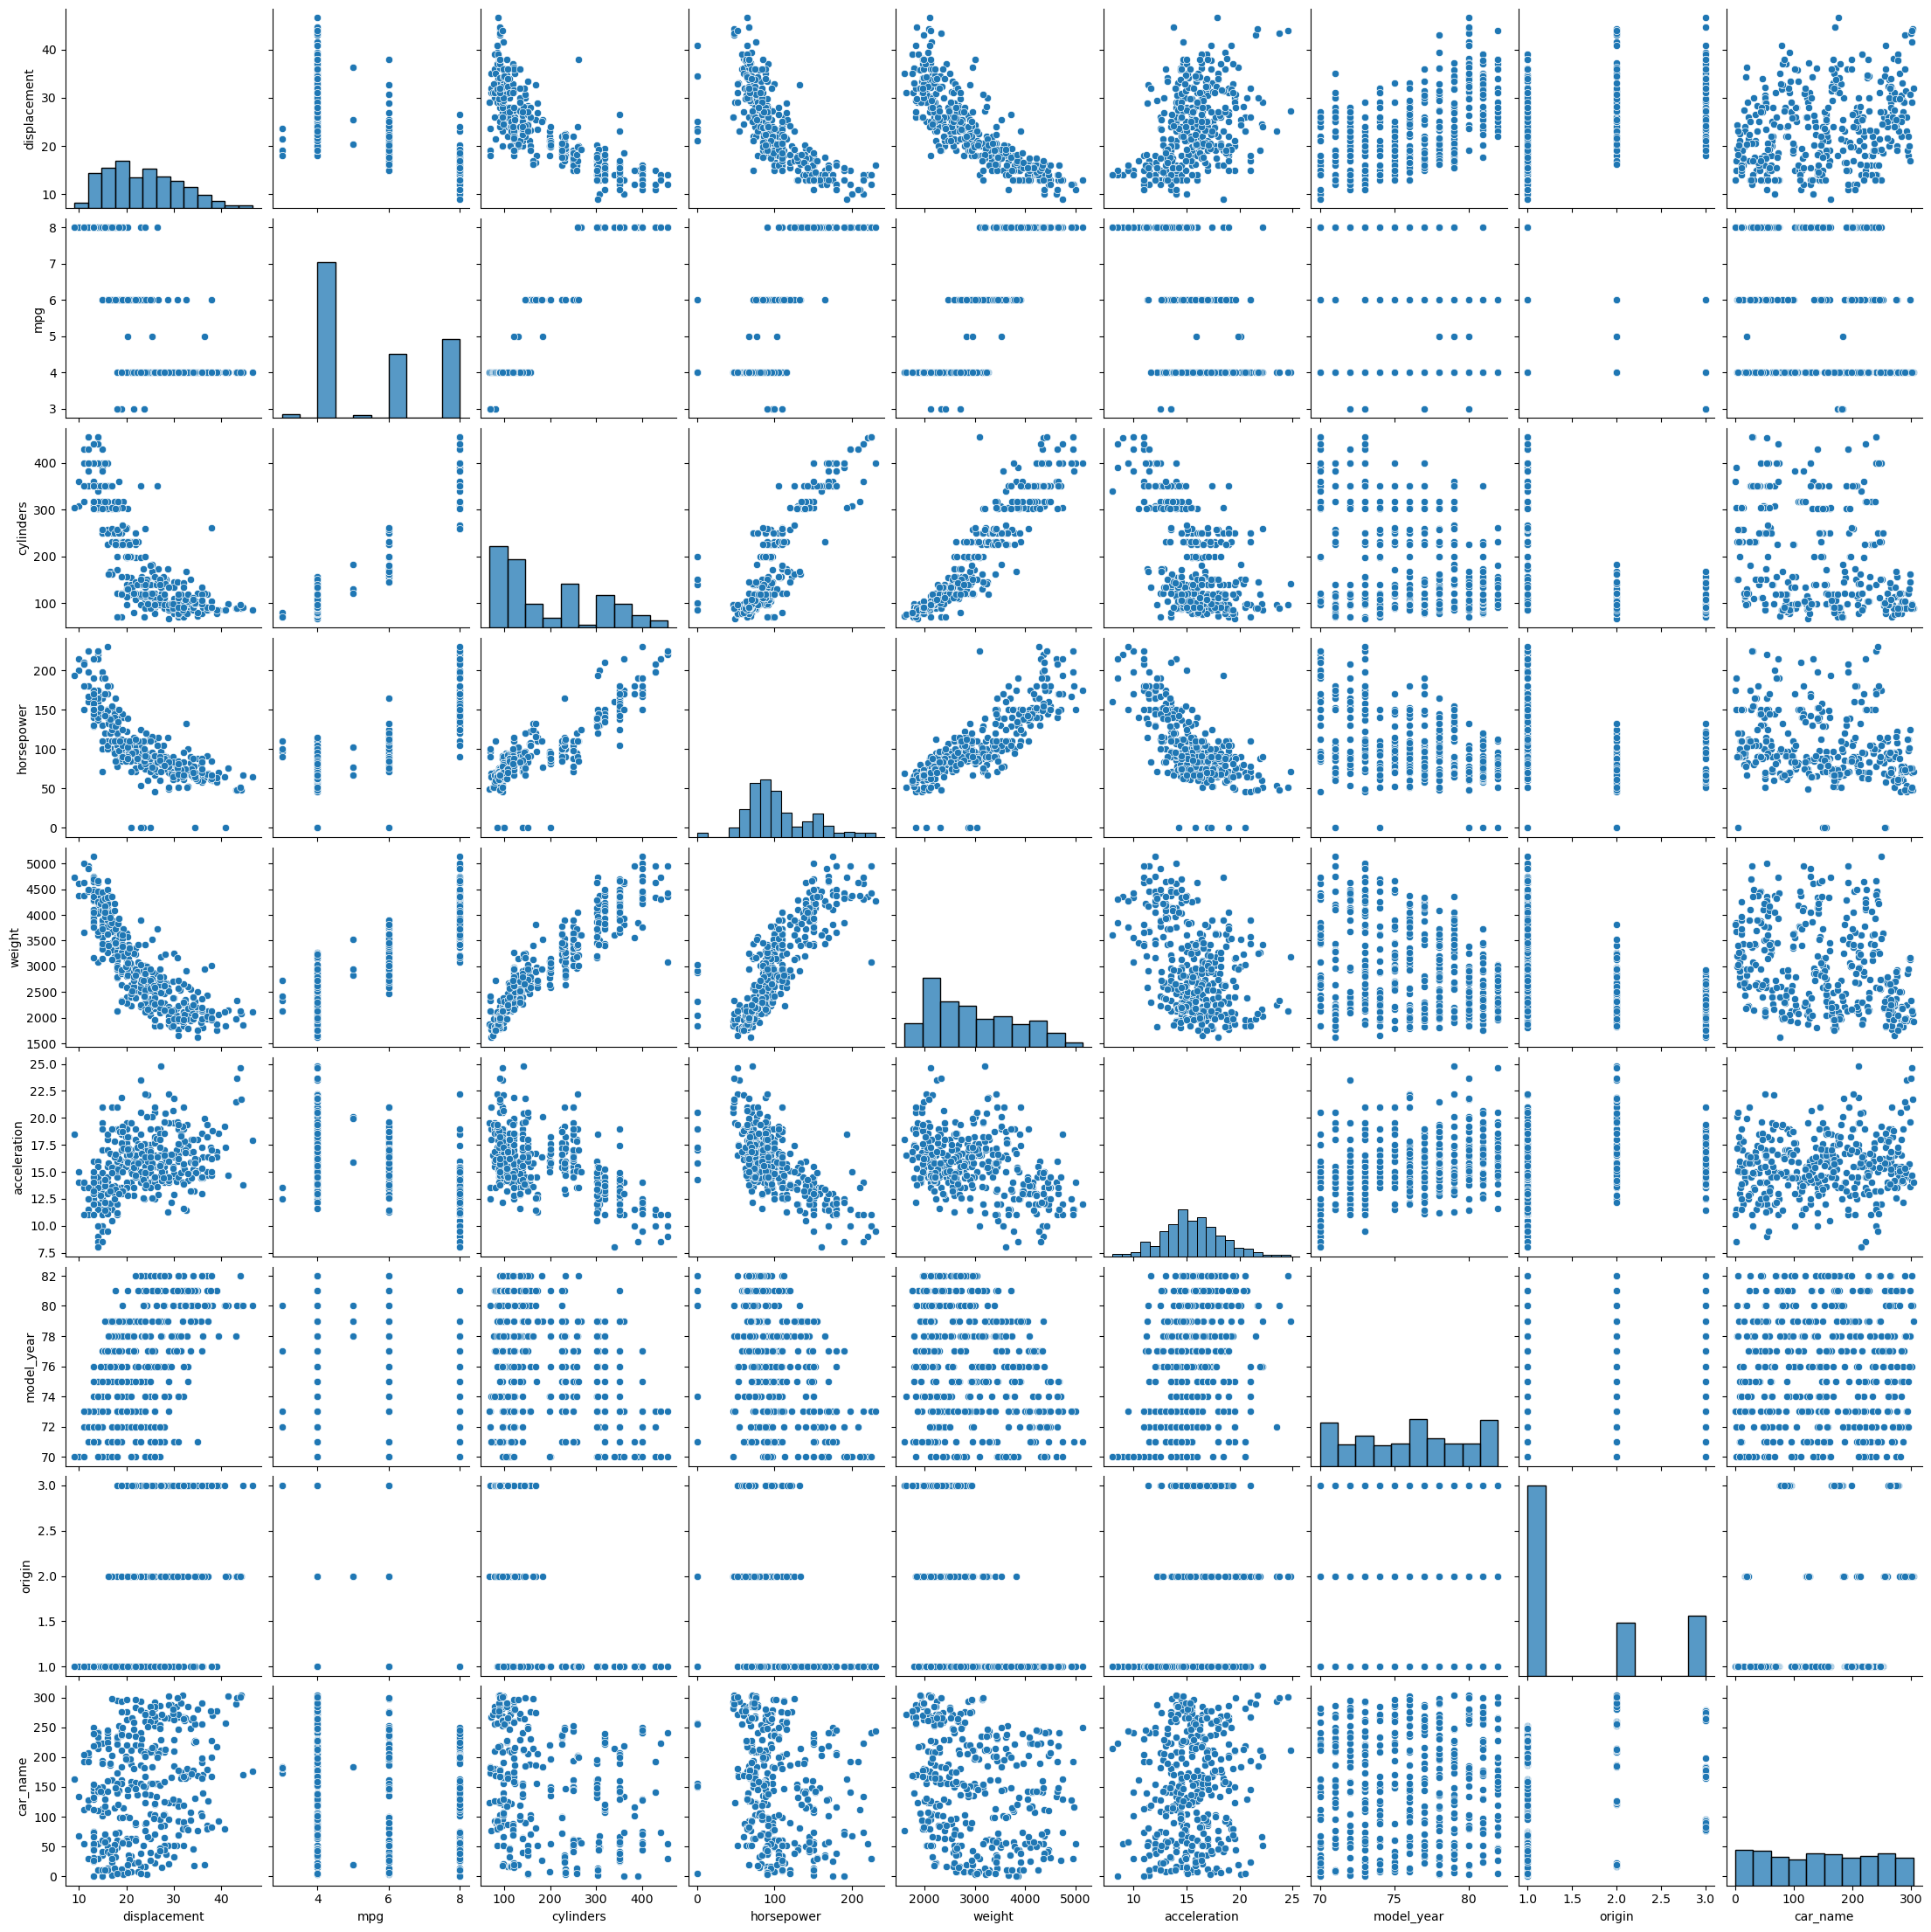

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)
plt.show()

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   mpg           398 non-null    int64  
 2   cylinders     398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    int32  
dtypes: float64(5), int32(1), int64(3)
memory usage: 26.6 KB


# heat map

(9, 9)


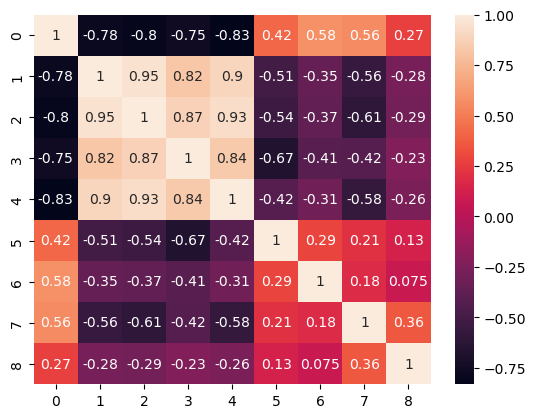

In [159]:
import numpy as np
cm=np.corrcoef(df.values.T)
print(cm.shape)
hm=sns.heatmap(cm, annot=True)
plt.show()

# target and data for testing and training

In [160]:
target=df["mpg"]

In [161]:
data=df.drop(columns=["mpg"])

# train test split

In [162]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(data, target, test_size=0.3)

In [163]:
x_train.describe()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,car_name
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.00000,278.000000
mean,23.724820,191.642086,102.661871,2941.485612,15.637410,76.251799,1.57554,150.485612
std,7.614692,102.312744,39.142718,810.357071,2.829506,3.611241,0.81483,88.178344
min,10.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,1.00000,0.000000
25%,17.775000,98.000000,75.000000,2212.250000,13.900000,73.000000,1.00000,71.500000
50%,23.000000,148.500000,94.000000,2845.000000,15.500000,76.000000,1.00000,150.000000
75%,29.500000,259.500000,120.000000,3516.000000,17.300000,79.000000,2.00000,230.750000
max,44.600000,455.000000,230.000000,4955.000000,24.800000,82.000000,3.00000,304.000000


In [164]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [165]:
pd.DataFrame(x_train_sc).describe()

,0,1,2,3,4,5,6,7
count,2.780000e+02,2.780000e+02,2.780000e+02,2.780000e+02,2.780000e+02,2.780000e+02,2.780000e+02,2.780000e+02
mean,1.789136e-16,-4.952074e-17,-1.789136e-16,-2.715653e-17,6.070284e-17,6.932903e-16,4.472841e-17,1.150159e-16
std,1.001803e+00,1.001803e+00,1.001803e+00,1.001803e+00,1.001803e+00,1.001803e+00,1.001803e+00,1.001803e+00
min,-1.805664e+00,-1.210651e+00,-2.627488e+00,-1.642340e+00,-2.704070e+00,-1.734327e+00,-7.076045e-01,-1.709683e+00
25%,-7.827697e-01,-9.169040e-01,-7.079671e-01,-9.015171e-01,-6.151404e-01,-9.020896e-01,-7.076045e-01,-8.973638e-01
50%,-9.535872e-02,-4.224292e-01,-2.216885e-01,-1.192803e-01,-4.865085e-02,-6.985207e-02,-7.076045e-01,-5.517083e-03
75%,7.597937e-01,6.644362e-01,4.437453e-01,7.102431e-01,5.886498e-01,7.623855e-01,5.218583e-01,9.118921e-01
max,2.746379e+00,2.578690e+00,3.259042e+00,2.489206e+00,3.244069e+00,1.594623e+00,1.751321e+00,1.744093e+00


# mean squared error and r2 score

In [166]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_sc, y_train)

LinearRegression()

In [167]:
x_train_pred=lr.predict(x_train_sc)
x_test_pred=lr.predict(x_test_sc)

In [168]:
from sklearn.metrics import mean_squared_error
print("Training Error: ", mean_squared_error(x_train_pred, y_train))
print("Testing Error: ", mean_squared_error(x_test_pred, y_test))

Training Error:  0.24884488240801533
Testing Error:  0.33252604039989536


In [169]:
from sklearn.metrics import r2_score
print("Training score: ", r2_score(x_train_pred, y_train))
print("Testing score: ",r2_score(x_test_pred, y_test))

Training score:  0.9024662676117544
Testing score:  0.8854569325042384


# RANSAC

In [170]:
from sklearn.linear_model import RANSACRegressor
ransac=RANSACRegressor(LinearRegression(), min_samples=20, max_trials=80, residual_threshold=4)
ransac.fit(x_train_sc, y_train)

RANSACRegressor(estimator=LinearRegression(), max_trials=80, min_samples=20,
                residual_threshold=4)

In [171]:
x_train_pred=ransac.predict(x_train_sc)
y_train_pred=ransac.predict(x_test_sc)
print("Training Error: ", mean_squared_error(x_train_pred, y_train))
print("Testing Error: ", mean_squared_error(x_test_pred, y_test))
print("Training Score: ", r2_score(x_train_pred, y_train))
print("Testing Score: ", r2_score(x_test_pred, y_test))

Training Error:  0.24884488240801542
Testing Error:  0.33252604039989536
Training Score:  0.9024662676117544
Testing Score:  0.8854569325042384


# LASSO

In [172]:
from sklearn.linear_model import Lasso
l1=Lasso()
l1.fit(x_train_sc, y_train)

Lasso()

In [207]:
x_train_pred=l1.predict(x_train_sc)
y_train_pred=l1.predict(x_test_sc)
print("Training Error: ", mean_squared_error(x_train_pred, y_train))
print("Testing Error: ", mean_squared_error(x_test_pred, y_test))
print("Training Score: ", r2_score(x_train_pred, y_train))
print("Testing Score: ", r2_score(x_test_pred, y_test))

Training Error:  1.2558171489302752
Testing Error:  0.08998749999999997
Training Score:  -2.545853490604426
Testing Score:  0.9690725540311481


# RIDGE

In [174]:
from sklearn.linear_model import Ridge
l2=Ridge()
l2.fit(x_train_sc, y_train)

Ridge()

In [175]:
x_train_pred=l2.predict(x_train_sc)
x_test_pred=l2.predict(x_test_sc)
print("Training Error: ", mean_squared_error(x_train_pred, y_train))
print("Testing Error: ", mean_squared_error(x_test_pred, y_test))
print("Training SCore: ", r2_score(x_train_pred, y_train))
print('Testing Score: ', r2_score(x_test_pred,y_test))

Training Error:  0.2491755972987981
Testing Error:  0.33287780456449323
Training SCore:  0.9016699286065084
Testing Score:  0.88489994184036


# ELASTIC NET

In [176]:
from sklearn.linear_model import ElasticNet
en=ElasticNet()
en.fit(x_train_sc, y_train)

ElasticNet()

In [177]:
x_train_pred=en.predict(x_train_sc)
x_test_pred=en.predict(x_test_sc)
print("Training Error: ", mean_squared_error(x_train_pred, y_train))
print("Testing Error: ", mean_squared_error(x_test_pred, y_test))
print("Training SCore: ", r2_score(x_train_pred, y_train))
print('Testing Score: ', r2_score(x_test_pred,y_test))

Training Error:  0.7907477249793587
Testing Error:  0.8358100840848972
Training SCore:  0.002481930482357564
Testing Score:  0.11155416377755956


# POLYNOMIAL

In [178]:
lr1=LinearRegression()
lr1.fit(x_train_sc,y_train)

LinearRegression()

In [179]:
from sklearn.preprocessing import PolynomialFeatures
quadratic=PolynomialFeatures(degree=2)
x_train_sc2=quadratic.fit_transform(x_train_sc)
print(x_train_sc2.shape)
print(x_train_sc2)

(278, 45)
[[ 1.          2.06225663 -1.04419453 ...  3.06712565 -1.14378794
   0.4265397 ]
 [ 1.          0.03620319 -0.5644071  ...  3.06712565  2.39786793
   1.87464463]
 [ 1.          1.10185467 -0.91690399 ...  0.50070412  0.79978164
   1.27750232]
 ...
 [ 1.          1.22026039 -0.98544505 ...  3.06712565  0.40817362
   0.05431982]
 [ 1.         -1.0162921   1.23724363 ...  0.50070412 -0.59099459
   0.69756687]
 [ 1.         -1.27941593  1.56036577 ...  0.50070412  0.07625643
   0.01161373]]


# polynomial regression degree 2

In [180]:
pr2=LinearRegression()
pr2.fit(x_train_sc2,y_train)

LinearRegression()

In [181]:
lr_pred=lr1.predict(x_train_sc)
pr2_pred=pr2.predict(x_train_sc2)
print("Linear Regression Error: ", mean_squared_error(lr_pred, y_train))
print("Polynomial regression 2 Error: ",mean_squared_error(pr2_pred, y_train))
print("Linear R2 Score: ",r2_score(lr_pred, y_train))
print("Poly2 Score: ", r2_score(pr2_pred, y_train))

Linear Regression Error:  0.24884488240801533
Polynomial regression 2 Error:  0.1279067700713076
Linear R2 Score:  0.9024662676117544
Poly2 Score:  0.9521362638034832


# polynomial regression degree 3

In [182]:
cubic=PolynomialFeatures(degree=3)
x_train_sc3=cubic.fit_transform(x_train_sc)
print(x_train_sc3.shape)
print(x_train_sc3)

(278, 165)
[[ 1.00000000e+00  2.06225663e+00 -1.04419453e+00 ... -2.00313997e+00
   7.47007984e-01 -2.78573108e-01]
 [ 1.00000000e+00  3.62031879e-02 -5.64407105e-01 ...  4.19943674e+00
   3.28310472e+00  2.56671960e+00]
 [ 1.00000000e+00  1.10185467e+00 -9.16903988e-01 ... -5.65929078e-01
  -9.03966376e-01 -1.44391805e+00]
 ...
 [ 1.00000000e+00  1.22026039e+00 -9.85445048e-01 ...  7.14843080e-01
   9.51314429e-02  1.26601092e-02]
 [ 1.00000000e+00 -1.01629210e+00  1.23724363e+00 ...  4.18190424e-01
  -4.93601451e-01  5.82611121e-01]
 [ 1.00000000e+00 -1.27941593e+00  1.56036577e+00 ... -5.39593947e-02
  -8.21792923e-03 -1.25157744e-03]]


In [183]:
pr3=LinearRegression()
pr3.fit(x_train_sc3, y_train)

LinearRegression()

In [208]:
lr_pred=lr1.predict(x_train_sc)
pr3_pred=pr3.predict(x_train_sc3)
print("Linear Regression Error: ", mean_squared_error(lr_pred, y_train))
print("Polynomial regression 3 Error: ",mean_squared_error(pr3_pred, y_train))
print("Linear R2 Score: ",r2_score(lr_pred, y_train))
print("Poly3 Score: ", r2_score(pr3_pred, y_train))

Linear Regression Error:  0.24884488240801533
Polynomial regression 3 Error:  0.2682142223385598
Linear R2 Score:  0.9024662676117544
Poly3 Score:  0.9101832172250627


# polynomial regression degree 4

In [185]:
cubic=PolynomialFeatures(degree=4)
x_train_sc4=cubic.fit_transform(x_train_sc)
print(x_train_sc4.shape)
print(x_train_sc4)

(278, 495)
[[ 1.00000000e+00  2.06225663e+00 -1.04419453e+00 ...  1.30825086e+00
  -4.87870966e-01  1.81936116e-01]
 [ 1.00000000e+00  3.62031879e-02 -5.64407105e-01 ...  5.74977061e+00
   4.49515024e+00  3.51429248e+00]
 [ 1.00000000e+00  1.10185467e+00 -9.16903988e-01 ...  6.39650667e-01
   1.02172289e+00  1.63201217e+00]
 ...
 [ 1.00000000e+00  1.22026039e+00 -9.85445048e-01 ...  1.66605705e-01
   2.21719165e-02  2.95064255e-03]
 [ 1.00000000e+00 -1.01629210e+00  1.23724363e+00 ...  3.49274603e-01
  -4.12258246e-01  4.86599540e-01]
 [ 1.00000000e+00 -1.27941593e+00  1.56036577e+00 ...  5.81504363e-03
   8.85621814e-04  1.34878781e-04]]


In [186]:
pr4=LinearRegression()
pr4.fit(x_train_sc4, y_train)

LinearRegression()

In [209]:
lr_pred=lr1.predict(x_train_sc)
pr4_pred=pr4.predict(x_train_sc4)
print("Linear Regression Error: ", mean_squared_error(lr_pred, y_train))
print("Polynomial regression 4 Error: ",mean_squared_error(pr4_pred, y_train))
print("Linear R2 Score: ",r2_score(lr_pred, y_train))
print("Poly4 Score: ", r2_score(pr4_pred, y_train))

Linear Regression Error:  0.24884488240801533
Polynomial regression 4 Error:  1.5809148526492176e-27
Linear R2 Score:  0.9024662676117544
Poly4 Score:  1.0


# SVR

In [188]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train_sc,y_train)

SVR()

In [189]:
x_train_pred=svr.predict(x_train_sc)
x_test_pred=svr.predict(x_test_sc)
print("Training Error: ", mean_squared_error(x_train_pred, y_train))
print("Testing Error: ", mean_squared_error(x_test_pred, y_test))
print("Training Score: ", r2_score(x_train_pred, y_train))
print("Testing Score: ", r2_score(x_test_pred, y_test))

Training Error:  0.11639952823356928
Testing Error:  0.21352968809864603
Training Score:  0.9560997762847351
Testing Score:  0.9208477364959701


# decision tree regression

In [190]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train_sc,y_train)

DecisionTreeRegressor()

In [191]:
x_train_pred=dt.predict(x_train_sc)
x_test_pred=dt.predict(x_test_sc)
print("Training Error: ", mean_squared_error(x_train_pred, y_train))
print("Testing Error: ", mean_squared_error(x_test_pred, y_test))
print("Training Score: ", r2_score(x_train_pred, y_train))
print("Testing Score: ", r2_score(x_test_pred, y_test))

Training Error:  0.0
Testing Error:  0.075
Training Score:  1.0
Testing Score:  0.9751381215469613


[Text(0.6166666666666667, 0.9166666666666666, 'x[1] <= -0.315\nsquared_error = 2.8\nsamples = 278\nvalue = 5.439'),
 Text(0.43333333333333335, 0.75, 'x[1] <= -0.457\nsquared_error = 0.116\nsamples = 151\nvalue = 4.053'),
 Text(0.26666666666666666, 0.5833333333333334, 'x[0] <= -0.687\nsquared_error = 0.015\nsamples = 136\nvalue = 4.0'),
 Text(0.13333333333333333, 0.4166666666666667, 'x[1] <= -0.941\nsquared_error = 0.25\nsamples = 2\nvalue = 3.5'),
 Text(0.06666666666666667, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 3.0'),
 Text(0.2, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 4.0'),
 Text(0.4, 0.4166666666666667, 'x[7] <= -1.477\nsquared_error = 0.007\nsamples = 134\nvalue = 4.007'),
 Text(0.3333333333333333, 0.25, 'x[2] <= -0.772\nsquared_error = 0.222\nsamples = 3\nvalue = 4.333'),
 Text(0.26666666666666666, 0.08333333333333333, 'squared_error = 0.0\nsamples = 1\nvalue = 5.0'),
 Text(0.4, 0.08333333333333333, 'squared_error = 0.0\nsamples = 2\nvalue = 4.0'),
 Text(0.46666

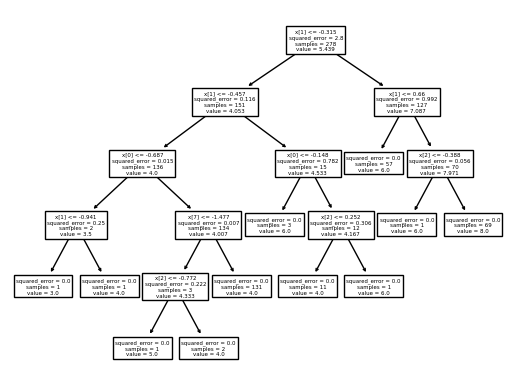

In [192]:
from sklearn import tree
tree.plot_tree(dt)

# random forest regression

In [193]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train_sc,y_train)

RandomForestRegressor()

In [194]:
x_train_pred=rf.predict(x_train_sc)
x_test_pred=rf.predict(x_test_sc)
print("Training Error: ", mean_squared_error(x_train_pred, y_train))
print("Testing Error: ", mean_squared_error(x_test_pred, y_test))
print("Training Score: ", r2_score(x_train_pred, y_train))
print("Testing Score: ", r2_score(x_test_pred, y_test))

Training Error:  0.012747122302158272
Testing Error:  0.08998749999999997
Training Score:  0.995372732671543
Testing Score:  0.9690725540311481


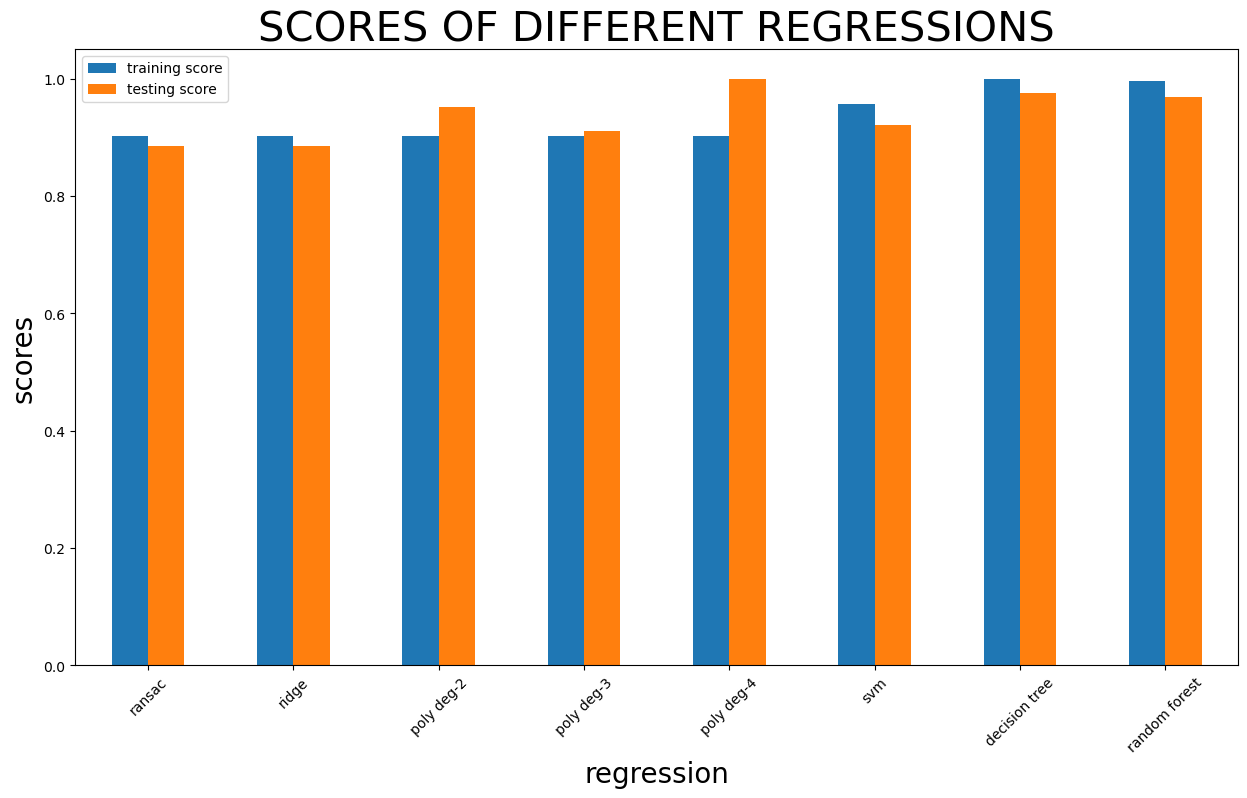

In [212]:
import matplotlib.pyplot as plt

plotdata = pd.DataFrame({

    "training score":[0.9024662676117544,0.9016699286065084,0.9024662676117544,
                     0.9024662676117544,0.9024662676117544,0.9560997762847351,1.0,0.995372732671543],

    "testing score":[0.8854569325042384,0.88489994184036,0.9521362638034832,
                    0.9101832172250627,1.0,0.9208477364959701,0.9751381215469613,0.9690725540311481],},

    index=["ransac","ridge","poly deg-2","poly deg-3","poly deg-4","svm","decision tree",
          "random forest"])

plotdata.plot(kind="bar",figsize=(15, 8))
plt.title("SCORES OF DIFFERENT REGRESSIONS",fontsize=30)
plt.xlabel("regression",fontsize=20)
plt.ylabel("scores",fontsize=20)
plt.xticks(rotation=45)
plt.show()